In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import ccdb
import napari
import hessian_cecp as hcecp

from importlib import reload

from tqdm.auto import tqdm
from scipy import ndimage as ndi


from imfun import fseq

/home/incredible/Neuroscience/venv/lib/python3.8/site-packages/image_funcut-0.6+80.gcf59f2c-py3.8.egg/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


Can't load imreg package, affine and homography registrations won't work


In [3]:
from astromorpho import io as aio
from astromorpho import enh, morpho

/home/incredible/Neuroscience/venv/lib/python3.8/site-packages/image_funcut-0.6+80.gcf59f2c-py3.8.egg/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(
/home/incredible/Neuroscience/venv/lib/python3.8/site-packages/numba/core/decorators.py:153: NumbaDeprecationWarning: The 'target' keyword argument is deprecated.
  warnings.warn("The 'target' keyword argument is deprecated.", NumbaDeprecationWarning)


In [4]:
rc('image', aspect='equal', interpolation='nearest',cmap='gray')
rc('figure', figsize=(10,10))

In [5]:
rc('axes', grid=True, labelsize=16)

In [6]:
data_path = '/home/incredible/Neuroscience/selected-for-complexity/data'

In [7]:
cd $data_path

/home/incredible/Neuroscience/selected-for-complexity/data


In [8]:
#sys.path.append('/home/brazhe/proj/semyanov-data-gitlab/')
sys.path.append('/home/incredible/Neuroscience/lib')

In [9]:
names = !ls *.pic
names = [name for name in names if not 'hm' in name]
# names

In [10]:
len([n for n in names if 'both' in n])

25

In [11]:
reload(hcecp)

<module 'hessian_cecp' from '/home/incredible/Neuroscience/morhpo_jup/hessian_cecp.py'>

## Test Data

In [19]:
def gaussian_blob(x,y, sigma_x, sigma_y):
    return np.exp(-x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2))

X,Y = mgrid[:256,:256]

#sigma_r_v = logspace(-1, 1.6, 16, base=2)
sigma_r_v = ones(1000)

locs = arange(15,250,15)
print(len(locs))


centers = [(r,c) for r in locs for c in locs]

img_x = np.sum([gaussian_blob(X-r,Y-c, sigma_r, sigma_r) for (r,c),sigma_r in zip(centers, sigma_r_v)],0)

16


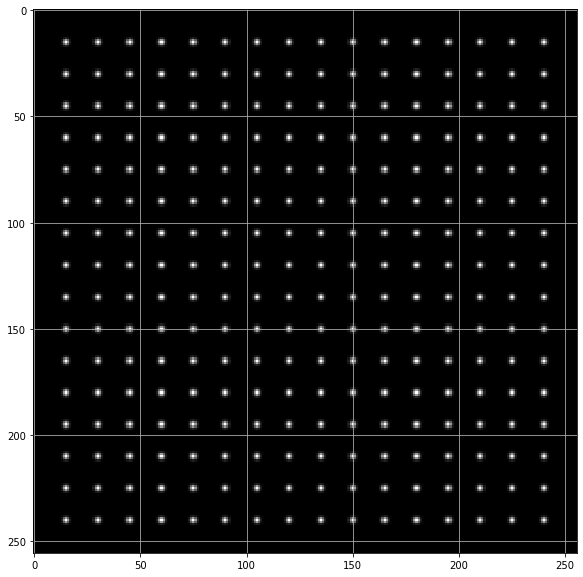

In [20]:
figure()
imshow(img_x)

In [21]:
test_stack =  np.array([img_x]*100)
test_stack = test_stack + randn(*test_stack.shape)*0.005

In [22]:
#test_stack = moveaxis(test_stack, 0,2)

In [23]:
test_stack.dtype

dtype('float64')

In [24]:
test_stack.shape

(100, 256, 256)

In [25]:
#%matplotlib qt
%gui qt

In [26]:
test_stack = test_stack.astype(float32)

In [27]:
napari.view_image(test_stack, ndisplay=3)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(49.5, 127.5, 127.5), zoom=2.1374999999999997, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=3, last_used=2, range=((0.0, 100.0, 1.0), (0.0, 256.0, 1.0), (0.0, 256.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'test_stack' at 0x7fbb50b32490>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari',

In [28]:
%time test_sato, Vf = hcecp.sato3d(test_stack, 3, return_vectors=True)

CPU times: user 12.4 s, sys: 438 ms, total: 12.8 s
Wall time: 12.9 s


In [29]:
napari.view_image(test_sato, ndisplay=3)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(49.5, 127.5, 127.5), zoom=2.1374999999999997, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=3, last_used=2, range=((0.0, 100.0, 1.0), (0.0, 256.0, 1.0), (0.0, 256.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'test_sato' at 0x7fbb8cfa6e20>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', 

In [28]:
reload(hcecp)

<module 'hessian_cecp' from '/home/incredible/Neuroscience/morhpo_jup/hessian_cecp.py'>

CPU times: user 17.1 s, sys: 3.59 s, total: 20.7 s
Wall time: 16.8 s


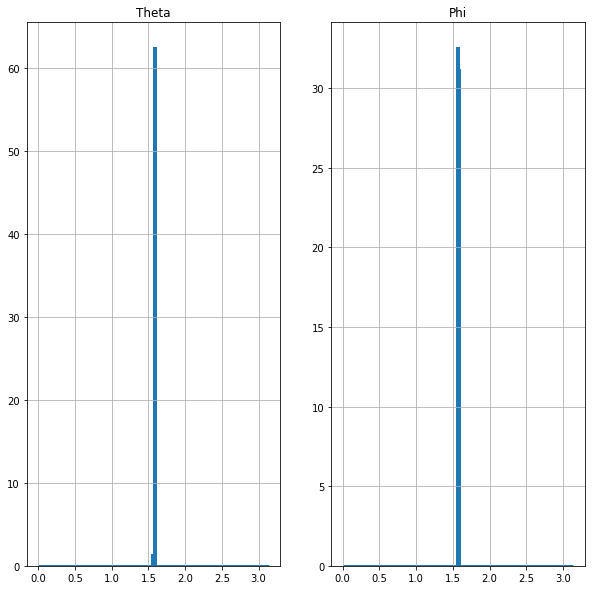

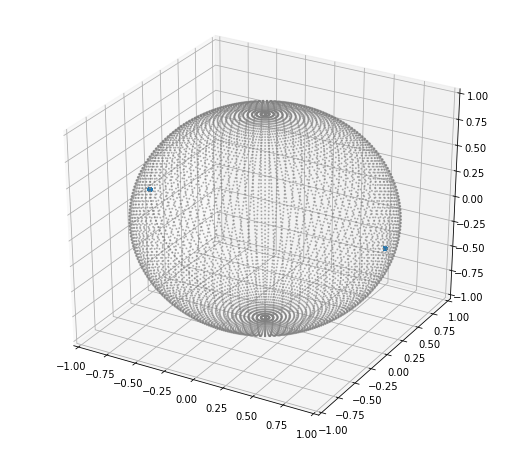

In [29]:
%time hc = hcecp.hessian_cecp3d(test_sato, 3, with_plot=True)

In [30]:
hc

(0.10206456527100416, 0.10139916164144716, 1.0)

## Real cell

In [12]:
#k = 18
#k = randint(len(names))
k = 48

print(k, names[k])
stack, meta = ccdb.read_pic(names[k])
dims = ccdb.get_axes(meta)#[::-1]
dims

48 3wk-ly6-raw.pic


[(0.0474359, "Microns'"), (0.0474359, "Microns'"), (0.25, "Microns'")]

In [13]:
if len(dims):
    zoom = dims[0][0]/dims[-1][0]
else:
    zoom = 4

In [14]:
1/zoom

5.2702699853908115

In [15]:
stackz = ndi.zoom(stack.astype(float),(1, zoom,zoom))

In [16]:
stack.shape, stackz.shape

((85, 1024, 1024), (85, 194, 194))

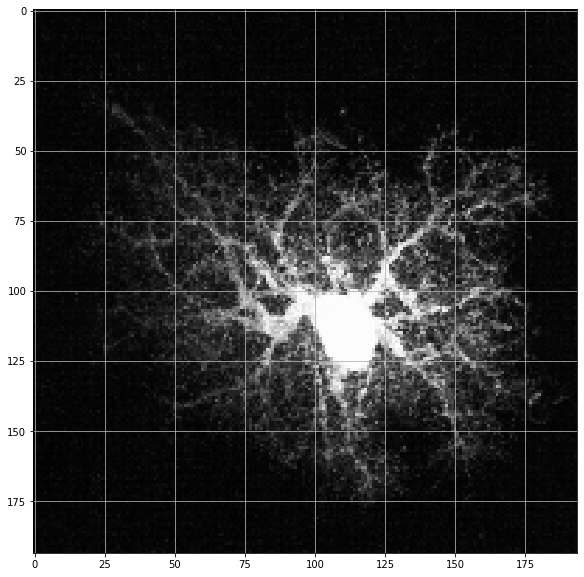

In [17]:
imshow(stackz.max(0))

In [18]:
w = napari.view_image(stackz, ndisplay=3, rendering='attenuated_mip', gamma=0.6)

In [19]:
#imshow(w.screenshot())
#grid(False)

In [25]:
%time data_sato = hcecp.sato3d(stackz, 1, return_vectors=False)
napari.view_image(data_sato, ndisplay=3, rendering='attenuated_mip', gamma=0.6)

CPU times: user 8.37 s, sys: 127 ms, total: 8.5 s
Wall time: 8.5 s


In [87]:
%time stackz_sato = hcecp.percentile_rescale(data_sato)
napari.view_image(stackz_sato, ndisplay=3, rendering='attenuated_mip', gamma=0.6)

CPU times: user 64.9 ms, sys: 3.87 ms, total: 68.8 ms
Wall time: 66.8 ms


Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(42.0, 96.5, 96.5), zoom=2.820618556701031, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=3, last_used=2, range=((0.0, 85.0, 1.0), (0.0, 194.0, 1.0), (0.0, 194.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'stackz_sato' at 0x7fa4a468dfd0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mo

In [30]:
tmp = stackz_sato - data_sato
napari.view_image(tmp, ndisplay=3, rendering='attenuated_mip', gamma=0.6)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(42.0, 96.5, 96.5), zoom=2.820618556701031, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=3, last_used=2, range=((0.0, 85.0, 1.0), (0.0, 194.0, 1.0), (0.0, 194.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'tmp' at 0x7fa4d5cb1190>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_move

In [42]:
from ucats.patches import make_grid

In [43]:
#make_grid(stackz.shape, 10,1)

In [44]:
w = napari.view_image(stackz, ndisplay=3, rendering='attenuated_mip')
w.add_image(stackz_sato, colormap='red', gamma=0.75, opacity=0.5)

<Image layer 'stackz_sato' at 0x7f96a21331f0>

In [45]:
# imshow(w.screenshot())
# grid(False)

In [46]:
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [47]:
stackz.shape

(85, 194, 194)

CPU times: user 10.7 s, sys: 2.27 s, total: 13 s
Wall time: 10.1 s


(0.9181477196416368, 0.17365364603108902, 1.0)

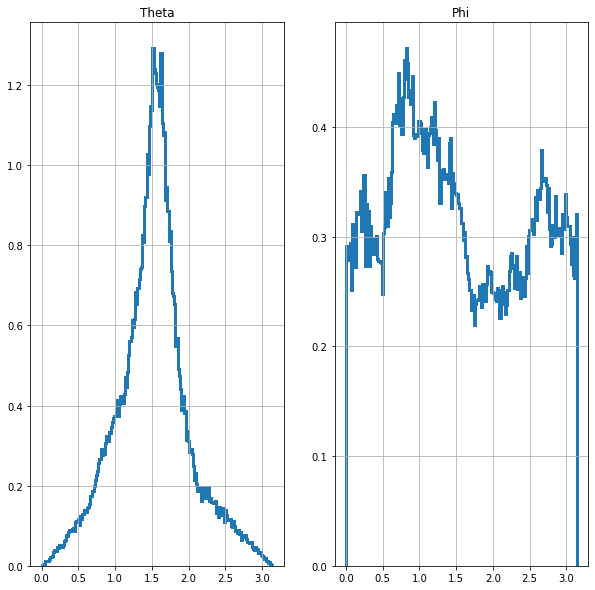

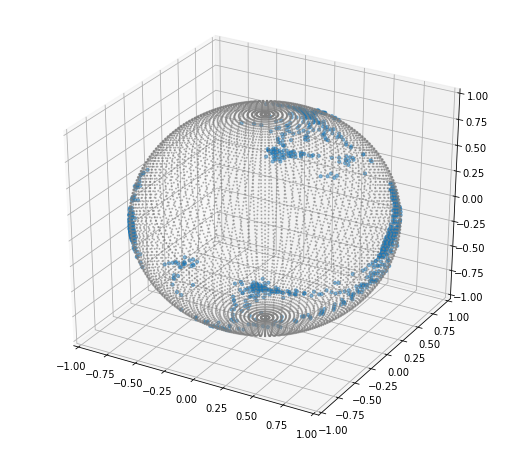

In [92]:
%time hc = hcecp.hessian_cecp3d(stackz, 3, nbins=25, with_plot=True)
hc

In [49]:
reload(hcecp)

<module 'hessian_cecp' from '/home/incredible/Neuroscience/morhpo_jup/hessian_cecp.py'>

In [50]:
# can do a 3D map then? Show complexity in 3D as overlay over 3D morphology?

In [93]:
# for illustrations
#patch_size=18
#patch_overlap = 16

# patch_size=24
# patch_overlap = 12

patch_size = 48
patch_overlap = 24

In [52]:
24*0.2, 48*0.2

(4.800000000000001, 9.600000000000001)

In [94]:

#%time hc_acc = hcecp.hessian_cecp3d(randn(*stackz.shape), 3, spatial_binning=patch_size,spatial_overlap=patch_overlap)
%time hc_acc = hcecp.hessian_cecp3d(stackz, 3, spatial_binning=patch_size,spatial_overlap=patch_overlap)

CPU times: user 37.5 s, sys: 26.8 s, total: 1min 4s
Wall time: 15.3 s


In [95]:
hc_mf = np.sum(hc_acc[:,:2]*hc_acc[:,2][:,None], axis=0)
hc_mf

array([0.88173861, 0.26642481])

In [55]:
stackz.shape

(85, 194, 194)

In [96]:
cstack = np.zeros(stackz.shape)
hstack = np.zeros(stackz.shape)

windows = hcecp.make_grid(stackz.shape, patch_size, patch_overlap)
counts = np.zeros(stackz.shape,int)

for w, hc in zip(windows, hc_acc):
    hstack[w] += hc[0]
    cstack[w] += hc[1]
    counts[w] += 1
    
cstack = cstack/(1e-5 + counts)
hstack = hstack/(1e-5 + counts)

In [97]:
len(hc_acc), len(windows)

(192, 192)

In [98]:
cstack.shape, stackz.shape

((85, 194, 194), (85, 194, 194))

In [ ]:
w = napari.view_image(stackz, ndisplay=3,colormap='red',gamma=0.75)
w.add_image(cstack,blending='additive',colormap='green',opacity=0.5)
#w.add_image(hstack,blending='additive',colormap='gray_r')

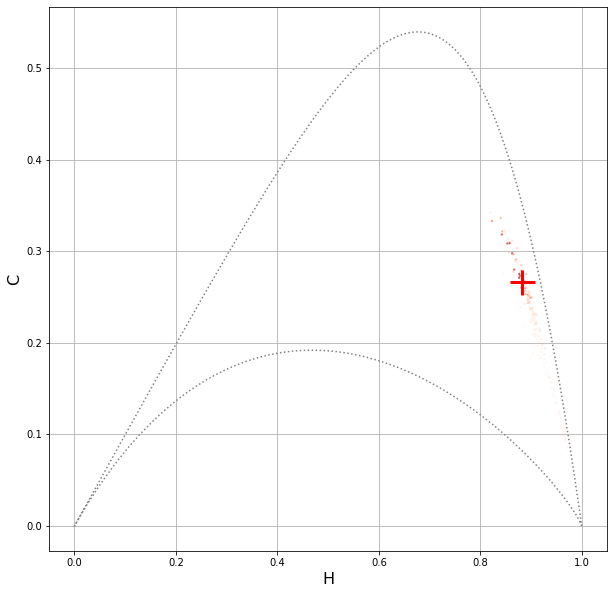

In [60]:
ax = hcecp.prep_hc_axes(50*50)
ax.scatter(hc_acc[:,0],hc_acc[:,1], s=2, c=hc_acc[:,2],alpha=0.5,cmap='Reds')
plot(hc_mf[0],hc_mf[1],'r+',ms=25,mew=3,)

In [61]:
# ax = hcecp.prep_hc_axes(50*50)
# ax.scatter(hc_acc[:,0],hc_acc[:,1], s=2, c=hc_acc[:,2],alpha=0.5,cmap='Reds')
# plot(hc_mf[0],hc_mf[1],'r+',ms=25,mew=3,)

CPU times: user 10.1 s, sys: 1.66 s, total: 11.8 s
Wall time: 8.73 s


(0.9301475977966008, 0.18054511126502884, 1.0)

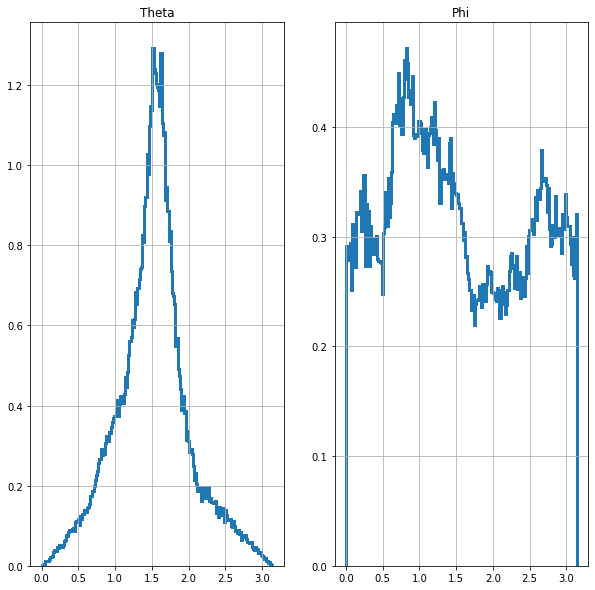

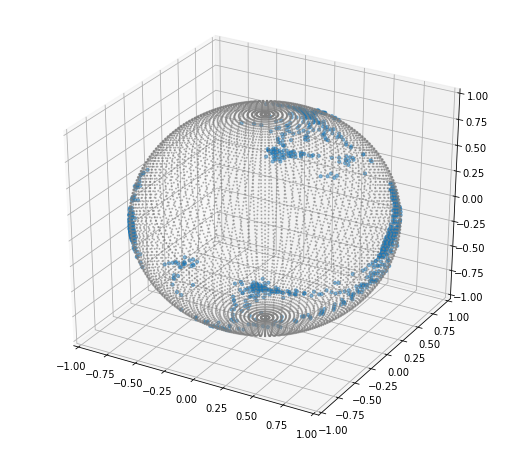

In [62]:
%time hc = hcecp.hessian_cecp3d(stackz, 3,  with_plot=True)
hc

In [63]:
sigmas = array((0.5, 1,2,4,8,))

In [64]:
hcx = array([hcecp.hessian_cecp3d(stackz, s) for s in tqdm(sigmas)])

  0%|          | 0/5 [00:00<?, ?it/s]

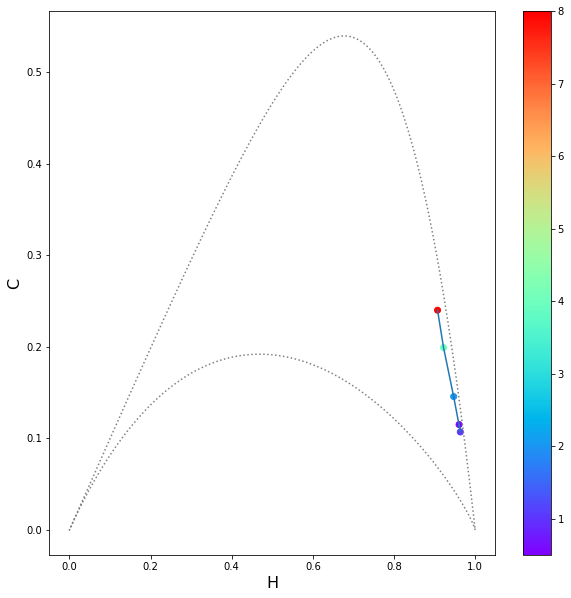

In [65]:
ax = hcecp.prep_hc_axes(50*50)

scatter(hcx[:,0],hcx[:,1],c=sigmas,cmap='rainbow');colorbar()
plot(hcx[:,0],hcx[:,1],'-')

grid(False)


### Collecting for all cells

In [66]:
len(names)

89

In [67]:
dim_acc = []
for name in names:
    stack_, meta_ = ccdb.read_pic(name)
    dims_ = ccdb.get_axes(meta_)#[::-1]
    dim_acc.append(dims_)
    


In [68]:
k = 7
names[k], ccdb.get_axes(ccdb.read_pic(names[k])[1])

('1wk-both7-red-raw.pic',
 [(0.0560606, "Microns'"), (0.0560606, "Microns'"), (0.2, "Microns'")])

In [69]:
[name for name in names if not  ccdb.get_axes(ccdb.read_pic(name)[1])]

['1wk-ly27.pic']

In [70]:
names_with_scale = [name for name in names if  ccdb.get_axes(ccdb.read_pic(name)[1])]

In [71]:

dim_acc = np.array([(d[1][0], d[2][0], d[2][0]/d[1][0]) for d in tqdm(dim_acc) if len(d)])

  0%|          | 0/89 [00:00<?, ?it/s]

In [72]:
#dim_acc

In [73]:
from scipy import stats

In [74]:
# data = dim_acc[:,0]

# hist(data,20);

# pdf = stats.kde.gaussian_kde(data)
# x = linspace(min(data),max(data),100)
# mode = x[argmax(pdf(x))]
# #m = stats.mode(dim_acc[:,0],)
# axvline(mode, color='tomato', ls = '--')
# print(mode)

0.2


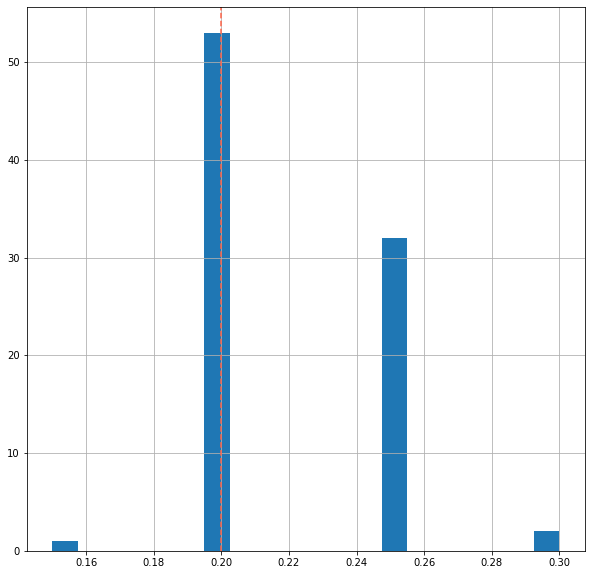

In [75]:
data = dim_acc[:,1]

hist(data,20);

pdf = stats.kde.gaussian_kde(data)
x = linspace(min(data),max(data),100)
mode = x[argmax(pdf(x))]
#m = stats.mode(dim_acc[:,0],)
axvline(mode, color='tomato', ls = '--')
print(mode)

In [76]:
target_scale_ = mode # um/px

In [77]:
target_scale_

0.2

In [78]:
target_scale = 0.2

In [79]:
def load_stack_with_rescale(name, target_scale=0.2,verbose=False):
    if verbose:
        print(name)
    stack_, meta_ = ccdb.read_pic(name)
    dims_ = ccdb.get_axes(meta_)#[::-1]
    dx, dz = dims_[1][0], dims_[2][0]
    if verbose:
        print(dx,dz)
        print(dx/target_scale, dz/target_scale)
    stackz = ndi.zoom(stack_.astype(float),(dz/target_scale, dx/target_scale,dx/target_scale), order=1)
    return stackz

In [80]:
name = names_with_scale[randint(len(names_with_scale))]
stackz = load_stack_with_rescale(name, verbose=True)

3wk-ly15-raw.pic
0.04567901 0.25
0.22839505 1.25


In [81]:
napari.view_image(stackz, ndisplay=3)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(44.0, 116.5, 116.5), zoom=2.3384615384615386, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=3, last_used=2, range=((0.0, 89.0, 1.0), (0.0, 234.0, 1.0), (0.0, 234.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'stackz' at 0x7f96da181b80>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mous

In [82]:
hc_acc.shape

(192, 3)

In [83]:

def get_cell_complexity(stack, sigmas=(0.5, 1, 2, 4, 8, 16), patch_size=24, patch_overlap=12):
    out = {}
    for s in sigmas:
        hc_acc = hcecp.hessian_cecp3d(stack, s, spatial_binning=patch_size,spatial_overlap=patch_overlap)
        hc_mf = np.sum(hc_acc[:,:2]*hc_acc[:,2][:,None], axis=0)
        out[s] = hc_mf
    return out
    

In [84]:
import pandas as pd

In [85]:
reload(hcecp)

<module 'hessian_cecp' from '/home/incredible/Neuroscience/morhpo_jup/hessian_cecp.py'>

In [86]:
2**arange(-1,4,0.5)

array([ 0.5       ,  0.70710678,  1.        ,  1.41421356,  2.        ,
        2.82842712,  4.        ,  5.65685425,  8.        , 11.3137085 ])

In [87]:
sigmas_new = np.round(logspace(-1,4,12, base=2),3)
#sigmas_new = 2**arange(-1,4,0.25)
sigmas_new

array([ 0.5  ,  0.685,  0.939,  1.287,  1.763,  2.416,  3.311,  4.537,
        6.218,  8.52 , 11.676, 16.   ])

In [88]:
%time res12 = get_cell_complexity(stackz,sigmas=sigmas_new,patch_size=12,patch_overlap=6)
%time res24 = get_cell_complexity(stackz,sigmas=sigmas_new,patch_size=24,patch_overlap=12)
%time res32 = get_cell_complexity(stackz,sigmas=sigmas_new,patch_size=32,patch_overlap=16)
%time res48 = get_cell_complexity(stackz,sigmas=sigmas_new,patch_size=48,patch_overlap=24)

CPU times: user 4min 54s, sys: 3.72 s, total: 4min 58s
Wall time: 5min
CPU times: user 3min 25s, sys: 2.84 s, total: 3min 28s
Wall time: 3min 28s
CPU times: user 17min 5s, sys: 14min, total: 31min 6s
Wall time: 5min 56s
CPU times: user 13min 26s, sys: 9min 58s, total: 23min 25s
Wall time: 5min 13s


In [89]:
df12 = pd.DataFrame(res12, index=('h','c'))
df24 = pd.DataFrame(res24, index=('h','c'))
df32 = pd.DataFrame(res32, index=('h','c'))
df48 = pd.DataFrame(res48, index=('h','c'))

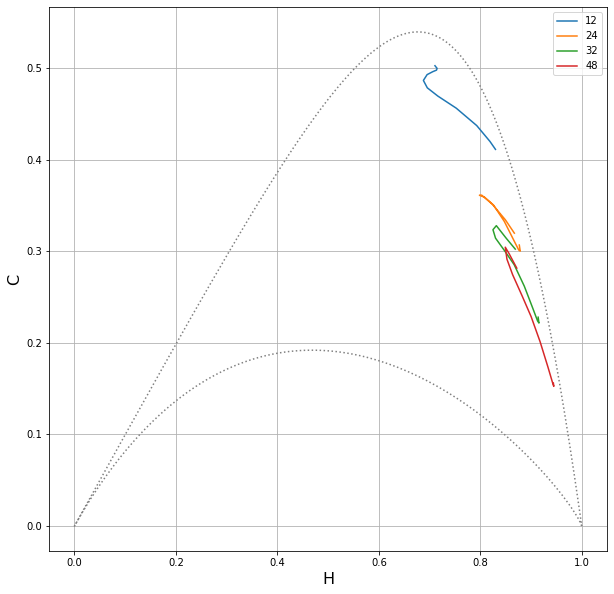

In [90]:
ax = hcecp.prep_hc_axes(50*50)
plot(df12.loc['h'], df12.loc['c'], label='12')
plot(df24.loc['h'], df24.loc['c'], label='24')
plot(df32.loc['h'], df32.loc['c'], label='32')
plot(df48.loc['h'], df48.loc['c'], label='48')
legend()

In [92]:
import pickle
import seaborn as sns
import os

In [93]:
shapes = array([load_stack_with_rescale(name).shape for name in tqdm(names_with_scale)])
shapes.mean(0)

  0%|          | 0/88 [00:00<?, ?it/s]

array([ 71.05681818, 311.48863636, 311.48863636])

In [94]:
name_test = names_with_scale[randint(len(names_with_scale))]
stack_test = load_stack_with_rescale(name)

In [95]:
stack_test.shape

(89, 234, 234)

In [96]:
napari.view_image(stack_test)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 116.5, 116.5), zoom=2.0705128205128203, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=2, range=((0.0, 89.0, 1.0), (0.0, 234.0, 1.0), (0.0, 234.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'stack_test' at 0x7f96d9e6ffa0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', m

In [97]:
stack_randomized = permutation(ravel(stack_test)).reshape(stack_test.shape)

In [98]:
napari.view_image(stack_randomized)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 116.5, 116.5), zoom=2.0705128205128203, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=2, range=((0.0, 89.0, 1.0), (0.0, 234.0, 1.0), (0.0, 234.0, 1.0)), current_step=(0, 0, 0), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'stack_randomized' at 0x7f96d9825730>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napa

In [ ]:
res_r = {}

for ps in tqdm((12, 16, 24, 32, 48, 64)):
    res_r[ps] = get_cell_complexity(stack_randomized,sigmas=sigmas_new,patch_size=ps,patch_overlap=ps//2)

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
res_r[12]

In [ ]:
fig, axs = subplots(2,1, sharex=True)
for ps in tqdm((12, 16, 24, 32, 48, 64)):
    d = pd.DataFrame(res_r[ps], index=('h','c'))
    axs[0].plot(d.loc['c'], label=ps)
    axs[1].plot(d.loc['h'],label=ps)
legend()

In [ ]:
d

In [ ]:
def collect_complexities(patch_size,sigmas,randomized=False,need_rebuild=False):
    
    if not randomized:
        out_file = f'outputs/hessian_cecps_results-new_patch{patch_size}.pickle'
    else:
        out_file = f'outputs/hessian_cecps_results-new_patch{patch_size}-randomized.pickle'

    if os.path.exists(out_file) and not need_rebuild:
        hc_results = pickle.load(open(out_file,'rb'))
    else:
        hc_results = []
        for name in tqdm(names_with_scale):
            stack = load_stack_with_rescale(name)
            if randomized:
                stack = permutation(ravel(stack)).reshape(stack.shape)
            res = get_cell_complexity(stack,sigmas=sigmas,patch_size=patch_size,patch_overlap=patch_size//2)
            hc_results.append((name,res))
        pickle.dump(hc_results, open(out_file,'wb'))
    
    wk1_results = [pd.DataFrame(r[1], index=('h','c')) for r in hc_results if '1wk' in r[0]]
    wk3_results = [pd.DataFrame(r[1], index=('h','c')) for r in hc_results if '3wk' in r[0]]
    wk4_results = [pd.DataFrame(r[1], index=('h','c')) for r in hc_results if '4wk' in r[0]]
    
    wk1_H = pd.DataFrame([r.loc['h'] for r in wk1_results],index=range(len(wk1_results)))
    wk1_C = pd.DataFrame([r.loc['c'] for r in wk1_results],index=range(len(wk1_results)))
    
    wk3_H = pd.DataFrame([r.loc['h'] for r in wk3_results],index=range(len(wk3_results)))
    wk3_C = pd.DataFrame([r.loc['c'] for r in wk3_results],index=range(len(wk3_results)))
    
    wk4_H = pd.DataFrame([r.loc['h'] for r in wk4_results],index=range(len(wk4_results)))
    wk4_C = pd.DataFrame([r.loc['c'] for r in wk4_results],index=range(len(wk4_results)))
    
    dr = pd.DataFrame(res_r[patch_size], index=('h','c'))
    #print(dr)
    
    colors = ('green','royalblue', 'tomato')
    
    fig, axs = subplots(2,3, sharey='row',sharex=True, figsize=(18,8),
                        gridspec_kw=dict(hspace=0.01,wspace=0.05,))
    for ax, data, color in zip(axs[0], [wk1_C, wk3_C, wk4_C], colors):
        if ax is axs[0,0]:
            ax.set_ylabel('Hessian complexity')
        sns.stripplot(data=data,size=5,color=color,linewidth=1,alpha=0.5,ax=ax)
        sns.boxplot(data=data,color='white',linewidth=3, width=0.25,ax=ax)
        #ax.plot(array(dr.loc['c']), color='skyblue', lw=3, alpha=0.5)

    
    
    
    #fig, axs = subplots(1,3, sharey=True, figsize=(18,6))
    #scales = array(sigmas)*target_scale
    for ax, data, color in zip(axs[1], [wk1_H, wk3_H, wk4_H], colors):
        if ax is axs[1,0]:
            ax.set_ylabel('Hessian entropy')
        sns.stripplot(data=data,size=5,color=color,linewidth=1,alpha=0.5,marker='d',ax=ax)
        sns.boxplot(data=data,color='white',linewidth=3, width=0.25,ax=ax)
        #ax.plot(array(dr.loc['h']),  color='skyblue', lw=3, alpha=0.5)
        #ax.set_xticklabels([f'{s*target_scale :1.2f}' for s in log2(sigmas_new)])
        ax.set_xticklabels([f'{s*target_scale :1.2f}' for s in sigmas])
        ax.set_xlabel('spatial scale um ')
    #tight_layout()
    #savefig('outputs/ccdb-hessian-complexity-entropy-patch=24-scale=0.2um-rand.png')
    #savefig('outputs/ccdb-hessian-complexity-entropy-patch=24-scale=0.2um.svg')
    savefig(f'outputs/ccdb-hessian-complexity-patch={patch_size}-scale=0.2um-rand:{randomized}.png')
    savefig(f'outputs/ccdb-hessian-complexity-patch={patch_size}-scale=0.2um-rand:{randomized}.svg')
    
    return hc_results

In [ ]:
target_scale

In [ ]:
64*0.2, 32*0.2, 16*0.2

In [ ]:
from ucats import masks as umasks

In [ ]:
import itertools as itt

def locations(shape):
    """ all locations for a shape; substitutes nested cycles
    """
    return itt.product(*map(range, shape))


def img2points(img, th=0):
    "Converts a mask to a list of points, as row,col"
    points = []
    for loc in locations(img.shape):
        if img[loc] >= th:
            points.append(loc + (img[loc],))
    return points

def img_center(img, th=0, gamma=1):
    pts = array(img2points(img, th))
    print(pts.shape)
    weights = pts[:,-1]**gamma
    weights = weights/(1e-6 + np.sum(weights))
    return np.sum(pts[:,:-1]*weights[:,None], axis=0)


def add_scalebar(ax,length=25, height=1,scale=0.1,xy=None,unit='μm',color='w'):
    l = length/scale
    h = height/scale
    setp(ax, xticks=[],yticks=[],frame_on=False)
    if xy is None:
        sh = ax.images[0].get_size()
        x = sh[1] - l - 0.05*sh[1]
        y = sh[0] - h - 0.05*sh[0]
        xy= x,y
    r = Rectangle(xy,l,h, color=color )
    ax.text(xy[0]+l/2,xy[1],s='{} {}'.format(length,unit),color=color,
            fontsize=18,
            horizontalalignment='center', verticalalignment='bottom')
    ax.add_patch(r)
    

In [ ]:
from imfun import ui

In [ ]:
x = load_stack_with_rescale(names_with_scale[randint(len(names_with_scale))])

proj = x[20:-20].max(0)
projs = ndi.gaussian_filter(proj,3)

pts = img2points(proj, 1)
c = img_center(projs, percentile(projs, 99))



patch_sizes=[16, 32, 64]

figure()
grid(False)
imshow(proj)
ax = gca()

#colormaps = [cm.Reds, cm.Blues, cm.Greens]

for j,ps in enumerate(patch_sizes):
    for i in range(5-j):
        color =  uniform(size=3)
        color[j] = 1
        color[:j] *= 0.75
        color[j+1:] *= 0.75
        x0,y0 = randint(proj.shape[0]-ps),randint(proj.shape[1]-ps)
        r = Rectangle((x0,y0), ps, ps, fc='none',edgecolor=color,lw=3)
        ax.add_patch(r)

add_scalebar(gca(), 10, scale=0.2)
#plot(c[1], c[0], 'ro')
setp(gca(), xticks=[], yticks=[])

In [ ]:
#pts

In [ ]:
%time hc_results_64 = collect_complexities(64, sigmas_new, need_rebuild=True)

In [ ]:
%time hc_results_48 = collect_complexities(48, sigmas_new,need_rebuild=True)

In [ ]:
%time hc_results_32 = collect_complexities(32, sigmas_new,need_rebuild=True)

In [ ]:
%time hc_results_24 = collect_complexities(24, sigmas_new,need_rebuild=True)

In [ ]:
%time hc_results_16 = collect_complexities(16, sigmas_new,need_rebuild=True)

In [ ]:
%time hc_results_12 = collect_complexities(12, sigmas_new,need_rebuild=True)

In [ ]:
%time hc_results_64r = collect_complexities(64, sigmas_new,randomized=True,need_rebuild=True)

In [ ]:
%time hc_results_48r = collect_complexities(48, sigmas_new,randomized=True,need_rebuild=True)

In [ ]:
%time hc_results_32r = collect_complexities(32, sigmas_new,randomized=True,need_rebuild=True)

In [ ]:
%time hc_results_24r = collect_complexities(24, sigmas_new,randomized=True,need_rebuild=True)

In [ ]:
%time hc_results_16r = collect_complexities(16, sigmas_new,randomized=True,need_rebuild=True)

In [ ]:
%time hc_results_12r = collect_complexities(12, sigmas_new,randomized=True,need_rebuild=True)


## Snails

 - [ ] Regularize vector field before running snails?
 - [ ] Tensor-based denoising for these data --> any good?

In [ ]:
stackz_keep = stackz

In [ ]:
stackz = test_stack

In [ ]:
#start_mask = np.zeros(stackz.shape, bool)
#start_mask[75//2-1:75//2+2, 275//2-1:275//2+2, 275//2-1:275//2+2] = True
#start_mask = np.ones(stackz.shape, bool)
start_mask = stackz > percentile(stackz, 25)
100*np.sum(start_mask)/stackz.size

In [ ]:
reload(hcecp)

In [ ]:
noise_sd = np.std(stackz-ndi.gaussian_filter(stackz,3))
noise_sd

In [ ]:
stackz_noisy = stackz + 2*noise_sd*randn(*stackz.shape)

In [ ]:
sigma = 1.5

In [ ]:
%time sato, Vf = hcecp.sato3d(stackz_noisy, sigma, hessian_variant='gradient_of_smoothed', return_vectors=True)

In [ ]:
#napari.view_image(sato*(sato > percentile(sato,95)), ndisplay=3, gamma=0.1)

In [ ]:
#noise_sd = np.std(stackz[sato <= percentile(sato,95)])
#noise_sd

In [ ]:
#%time trails = hcecp.turbosnail_vesselness_food(stackz, 1.0, T=500,mask=start_mask)
tsnail_kw = dict(amp=0.5, vfield_gamma=1, min_counts=10, T=2000, mask=start_mask)
%time xtrails, vtrails,counts = hcecp.turbosnail_vesselness_food(stackz_noisy, sigma,food_memory=3, **tsnail_kw)

In [ ]:
%time xtrails_long, vtrails_long,counts_long = hcecp.turbosnail_vesselness_food(stackz_noisy, sigma, food_memory=9, **tsnail_kw)

In [ ]:
sigmas = [0.75, 1.5, 3, 6]

In [ ]:
ms_xtrails = {sigma:hcecp.turbosnail_vesselness_food(stackz_noisy, sigma, food_memory=3, **tsnail_kw) for sigma in tqdm(sigmas)}

In [ ]:
ms_sato = {sigma:hcecp.sato3d(stackz_noisy, sigma,return_vectors=False) for sigma in tqdm(sigmas)}

In [ ]:
#%time trails1 = hcecp.turbosnail_vesselness(stackz, 1.0, amp=2, vfield_gamma=0.5, T=500,mask=start_mask)

In [ ]:
loc = 99,95

In [ ]:
np.min(counts)

In [ ]:
figure(figsize=(12,4))
hist(ravel(counts[counts>0]), 200, density=True,log=True,);
#xlim(0,50)

In [ ]:
plot(stackz_noisy[:,loc[0],loc[1]], label='raw')

for s in sigmas:
    plot(ms_xtrails[s][0][:,loc[0],loc[1]],label=s)

#plot(xtrails[:,loc[0],loc[1]],label='short')
#plot(xtrails_long[:,loc[0],loc[1]],label='long')

#plot(vtrails[:,loc[0],loc[1]],label='short')
#plot(vtrails_long[:,loc[0],loc[1]],label='long')


legend()

In [ ]:
napari_kw = dict( gamma=0.75, rendering='mip',blending='additive')

In [ ]:
#w.add_image?

In [ ]:
# w = napari.view_image(stackz_noisy, ndisplay=3, name='raw', **napari_kw)
# w.add_image(xtrails, colormap='magenta',name='xtrails', **napari_kw)
# w.add_image(xtrails_long, colormap='green',name='xtrails_long', **napari_kw)
# w.add_image(vtrails, colormap='yellow',name='vtrails', **napari_kw)
# #w.add_image(vtrails_long, colormap='cyan', **napari_kw)
# w.add_image(counts, colormap='cyan', **napari_kw)
# w.add_image(sato, colormap='red', **napari_kw)

In [ ]:
#w.close()

In [ ]:
#counts

In [ ]:
colormap_ring = ['yellow','green','magenta','cyan']

In [ ]:
ms_sato_mx = np.max([ms_sato[s]*s**2 for s in sigmas],0)

In [ ]:
w = napari.view_image(stackz_noisy, ndisplay=3, name='raw', **napari_kw)
for s,cm in zip(sigmas,colormap_ring):
    w.add_image(ms_sato[s], colormap=cm, name=f'sato_{s:1.2f}',**napari_kw)
    
w.add_image(ms_sato_mx, colormap='red',name='max_proj',**napari_kw)
w.add_image(stackz_noisy*hcecp.percentile_rescale(ms_sato_mx), colormap='red',name='weighted',**napari_kw)

In [ ]:
ms_trails_mean = np.mean([ms_xtrails[s][0] for s in sigmas],0)

In [ ]:
w2 = napari.view_image(stackz_noisy, ndisplay=3, name='raw', **napari_kw)
for s,cm in zip(sigmas,colormap_ring):
    w2.add_image(ms_xtrails[s][0], colormap=cm, name=f'xtrails_{s:1.2f}', **napari_kw)
    
w2.add_image(ms_trails_mean, colormap='red',name='max_proj',**napari_kw)    

In [ ]:
w3 = napari.view_image(stackz_noisy, ndisplay=3, name='raw', **napari_kw)
for s,cm in zip(sigmas,colormap_ring):
    w3.add_image(ms_xtrails[s][1], colormap=cm, name=f'vtrails_{s:1.2f}',**napari_kw)

In [ ]:
w4 = napari.view_image(stackz_noisy, ndisplay=3, name='raw', **napari_kw)
for s,cm in zip(sigmas,colormap_ring):
    w4.add_image(ms_xtrails[s][1]/(1e-6+ms_xtrails[s][2]), colormap=cm, name=f'vtrails_{s:1.2f}',**napari_kw)

In [ ]:
w5 = napari.view_image(stackz_noisy, ndisplay=3, name='raw', **napari_kw)
w5.add_image(ms_trails_mean,name='ms_trails', **napari_kw)
w5.add_image(stackz_noisy-ms_trails_mean,name='ms_trails', **napari_kw)

In [ ]:
#napari.view_image(stackz_noisy*hcecp.percentile_rescale(np.max([ms_sato[s]*s**2 for s in sigmas],0)))

In [ ]:
weights = hcecp.percentile_rescale(sato)

In [ ]:
mask = weights > 0.99

In [ ]:
field = 10*Vf[...,0][...,::-1]*weights[...,None]

In [ ]:
minus_field = -field

In [ ]:
#starts = permutation(array(where(mask)).T)[:min(sum(mask),1)]
starts = np.array([(38, 150, 196),
                   (44,99,153),
                   (41,71,79),
                   (16,163,135),
                  ])
len(starts)

In [ ]:

#trails = hcecp.collect_trails(field, start_mask)
trails = np.zeros(stackz.shape)


kw = dict(dt=0.25, T=100000, m=10, gamma_speed=0.05,friction=0.1, wrap_bounds=False)

for x0 in tqdm(starts):
    hcecp.make_trajectory3d(x0, field, trails, **kw)
    hcecp.make_trajectory3d(x0, minus_field, trails, **kw)

In [ ]:
np.max(trails)

In [ ]:
w = napari.view_image(stackz, ndisplay=3)
w.add_image(log(1+clip(trails,0,10)), colormap='red',blending='additive')

In [ ]:
reload(hcecp)

In [ ]:
ms_sato = {}

In [ ]:
ms_sato[1.5] = hcecp.sato3d(stackz, 1.5)

In [ ]:
%time trails = hcecp.turbosnail_vesselness(stackz, 1.5, T=1000, dt=0.25, mask=ones(stackz.shape,bool))

In [ ]:
ms_trails = {s:hcecp.turbosnail_vesselness(stackz, s, T=1000, dt=0.25, mask=ones(stackz.shape,bool)) for s in tqdm(sigmas)}

In [ ]:
ms_trails_combined = np.sum([ms_trails[k] for k in [1,2,4]],axis=0)

In [ ]:
sigmas

In [ ]:
w = napari.view_image(stackz, ndisplay=3)
#w.add_image(log(1+clip(trails,0,100)), colormap='red',blending='additive')
#w.add_image(ms_sato[1.5], colormap='green',blending='additive',gamma=0.5)
#w.add_image(ndi.median_filter(trails,3), colormap='magenta',blending='additive',gamma=0.5)
w.add_image(ndi.median_filter(ms_trails[0.5],3), colormap='magenta',blending='additive',gamma=0.5)
w.add_image(ndi.median_filter(ms_trails[1],3), colormap='red',blending='additive',gamma=0.5)
w.add_image(ndi.median_filter(ms_trails[2],3), colormap='green',blending='additive',gamma=0.5)
w.add_image(ndi.median_filter(ms_trails[4],3), colormap='blue',blending='additive',gamma=0.5)
#w.add_image(ndi.median_filter(ms_trails_combined,3), colormap='magenta',blending='additive',gamma=0.5)

In [ ]:
scr = w.screenshot()
imshow(scr)
grid(False)

In [ ]:
napari.view_image(weights==0)

In [ ]:
%time meta_acc = [ccdb.get_axes(ccdb.read_pic(name)[1]) for name in names]

In [ ]:
spatial_scales = [(name, m[0][0]) if len(m) else (name, None) for name,m in zip(names,meta_acc)]

In [ ]:
spatial_scales

In [ ]:
_ = hist([s[1] for s in spatial_scales], 25)
axvline(0.05, color='r', ls='--')

In [ ]:
target_scale= 0.05 # um/px

In [ ]:
import os

def make_filtered_stack(name, scale, suff = '-fproj'):
    print('Loading z-stack %s.'%name)
    
    out_img_name = name + suff+'.png'
    out_name = name + suff + '.npy'
    
    if os.path.exists(out_name):
        print('skipping an already existing file/n/n')
        return
    
    stack, meta = ccdb.read_pic(name)
    stack = aio.resample_stack(stack, scale, target_scale)
    
    print('Making filtered stack')
    stack_f = enh.get_filtered_stack(stack,njobs=10)
    stack_f = enh.simple_rescale(stack_f, 0.05, 99.95)
    
    
    
    print('Saving output to %s'%out_name)
    
    projection = stack_f.max(0)
    np.save(out_name, projection)

    f,axs = plt.subplots(1,2, figsize=(14,7))
    for ax,st in zip(axs, (stack,stack_f)):
        img = enh.simple_rescale(st.max(0))
        ax.imshow(img, cmap='gray')
    f.tight_layout()
    f.savefig(out_img_name)
    close(f)
    print('/n/n')
    return projection
    
def make_simple_projection(name, scale, suff='-mxproj'):
    print('Loading z-stack %s.'%name)
    
    out_name = name + suff + '.npy'
    
    if os.path.exists(out_name):
        print('skipping an already existing file/n/n')
        return
    
    stack, meta = ccdb.read_pic(name)
    stack = aio.resample_stack(stack, scale, target_scale)
    
    
    print('Saving output to %s'%out_name)
    
    projection = stack.max(0)
    np.save(out_name, projection)
    

In [ ]:

#for name, scale in spatial_scales:
#   make_simple_projection(name,scale)

In [ ]:
%connect_info

In [ ]:
processed_names = [n for n,_ in spatial_scales]

In [ ]:
projections = [np.load(name+'-fproj.npy') for name in processed_names]
projections_simple = [np.load(name+'-mxproj.npy') for name in processed_names]

cmasks = [np.load(name+'-fproj-cmask.npy') for name in processed_names]
cmasks2 = [np.load(name+'-fproj-cmask2.npy') for name in processed_names]

In [ ]:
len(projections)

In [ ]:
from imfun import ui

In [ ]:
ui.group_maps([p for p,n in zip(projections, processed_names) if '1wk' in n],7,colorbar=False)
tight_layout()

In [ ]:
week_tags = {n.split('-')[0].strip() for n in processed_names}
week_tags

In [ ]:
ui.group_maps([p for p,n in zip(projections, processed_names) if '3wk' in n],colorbar=False)
tight_layout()

In [ ]:
ui.group_maps([p for p,n in zip(projections, processed_names) if '4wk' in n],colorbar=False)
tight_layout()

In [ ]:
from collections import defaultdict

In [ ]:
from imfun import fseq

In [ ]:
grouped_projs.keys()

In [ ]:
%matplotlib tk

In [ ]:
for _,_,p in grouped_projs['1wk']:
    p.start()

In [ ]:
close('all')

In [ ]:
imshow(grouped_projs['1wk'][-2][1])

In [ ]:
p = grouped_projs['1wk'][-2][1]
m = p > 0.1*p.max()


In [ ]:
import morphsnakes

In [ ]:
%matplotlib tk

In [ ]:
def make_cell_mask(p):
    m = p >= 0.1*p.max()
    px = enh.dctsplines.l2spline(p,1)# - enh.dctsplines.l2spline(p, 100)
    px = clip(px, 0.01*px.max(), px.max())
    #px = clip(px, 1e-5, px.max())
    acwe = morphsnakes.MorphACWE(sqrt(px), smoothing=1, lambda1=1, lambda2=10)
    acwe.set_levelset(m)
    acwe.run(1000)
    mask = enh.largest_region(acwe.levelset)
    return mask

In [ ]:
from scipy import ndimage

In [ ]:
def auto_levelset(data):
    #return data > threshold_otsu(data)
    return data > percentile(data, 25)
    #return data > 0.1*np.max(data)
    #return data > percentile(data, 75)
    
    
def make_cell_mask2(p):
    out = np.zeros_like(p)
    sh = p.shape
    p = ndimage.zoom(p, 0.25)
    m = p >= 0.1*p.max()
    
    px = enh.dctsplines.l2spline(p,1)# - enh.dctsplines.l2spline(p, 100)
    px = clip(px, 0.01*px.max(), px.max())
    #px = clip(px, 1e-5, px.max())
    acwe = morphsnakes.MorphACWE(sqrt(px), smoothing=3, lambda1=1, lambda2=5)
    acwe.set_levelset(auto_levelset(px))
    acwe.run(1000)
    mask = enh.largest_region(acwe.levelset)
    mask =  ndimage.zoom(mask.astype(float32),4)>0.5
    sh2 = mask.shape
    crop = ([slice(min(sh_,sh2_)) for sh_,sh2_ in zip(sh, sh2)])
    out[crop] = mask[crop]
    return out.astype(bool)

In [ ]:
from imfun import ui

In [ ]:
k = 57
p = projections[k]
px = enh.simple_rescale(projections_simple[k])
#%time mask1 = make_cell_mask(p)
%time mask2 = make_cell_mask2(px)
print(p.shape, mask2.shape)
ui.group_maps([px,p, mask1,mask2],colorbar=False, imkw=dict(cmap='plasma'),figscale=7)
gcf()

In [ ]:
figure(figsize=(12,12)); imshow(projections[k]); 
contour(mask2, levels=[0.5],colors='r')

In [ ]:
close('all')

In [ ]:
argmax([p.shape[0] for p in projections])

In [ ]:
px = enh.dctsplines.l2spline(p,1)
px = clip(px, 0.01*px.max(), px.max())

#%time px = enh.dctsplines.l2spline(p,1)-enh.dctsplines.l2spline(p, 100)
#px = clip(px, 1e-5, px.max())

In [ ]:
imshow(sqrt(px))

In [ ]:
#imshow(log(px)); 
imshow(p)
contour(mask, levels=[0.5], colors=['r'])
#contour(enh.largest_region(acwe.levelset), levels=[0.5], colors=['r'])
#gcf()

In [ ]:
%matplotlib inline

In [ ]:
%time cmasks = [make_cell_mask(p) for p in projections]

In [ ]:
%time cmasks2 = [make_cell_mask2(enh.simple_rescale(p)) for p in projections_simple]

In [ ]:
from collections import defaultdict

In [ ]:
grouped_projs = defaultdict(list)

for proj,cmask,name in zip(projections,cmasks2,processed_names):
    tag = name.split('-')[0].strip()
    #picker = ui.Picker(fseq.from_array(array([proj]*10)))
    grouped_projs[tag].append((name, proj, cmask))

In [ ]:
def show_cells(key,figscale=6):
    nelements = len(grouped_projs[key])
    nrows,ncols = ui.plots.guess_gridshape(nelements)
    figsize = (figscale*ncols,figscale*nrows)
    f,axs = subplots(nrows,ncols,figsize=figsize)
    
    for (name, proj, cmask),ax in zip(grouped_projs[key],ravel(axs)):
        ax.imshow(proj)
        ax.contour(cmask, levels=[0.5],colors='r')
        setp(ax, 'xticks', [], 'yticks', [],  'frame_on', False)
    for ax in ravel(axs)[nelements:]:
        setp(ax, visible=False)
    tight_layout()

In [ ]:
show_cells('1wk')

In [ ]:
show_cells('3wk')

In [ ]:
show_cells('4wk')

**NB!** other ideas for masks:

 0. Use simple projections (with clipped intensity) for masks
 1. First downsample, then run with `smooth=2`, then upsample the mask
 2. Also make and use masks for thick branches and soma
